In [1]:
# %matplotlib widget

import os
import numpy as np
import pandas as pd
import itertools as it
from glob import glob
import matplotlib.pyplot as plt
from sbpy.calib import Sun
from astropy import units as u
from astropy.io import fits

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from astropy.visualization import ImageNormalize, PercentileInterval, AsinhStretch

from lvmdrp.core.constants import LVM_UNAM_URL
from lvmdrp.utils.examples import fetch_example_data, get_frames_metadata, fix_lamps_metadata, get_masters_metadata

from lvmdrp.core import rss, image, spectrum1d
from lvmdrp.functions import imageMethod, rssMethod, fluxCalMethod

plt.style.use("seaborn-v0_8-talk")

In [2]:
# define input data directory
data_path = os.path.abspath(os.path.join("..", "data"))

# let's create the output directory
output_path = "./data"
os.makedirs(output_path, exist_ok=True)

# create processed frames path template
out_main_path = os.path.join(output_path, "lvm-{kind}-{camera}-{expnum}.fits")
out_calib_path = os.path.join(output_path, "lvm-{mjd}-{kind}-{camera}-{exptime}.fits")
out_arc_path = os.path.join(output_path, "lvm-{mjd}-{kind}-{camera}-{lamps}.fits")

# overwrite or not
OVERWRITE = True

In [3]:
# extract metadata
frames_table = get_frames_metadata(path=os.path.join(data_path, "lco_com"), ignore_cache=False).to_pandas()
frames_table = frames_table.loc[~frames_table.mjd.isin([60008,60009,60037,60038])]
# fix arc lamps metadata
fix_lamps_metadata(metadata=frames_table, lamp_names="argon neon ldls hgne xenon krypton".split())

[INFO]: loading cached metadata from '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/frames_table.pkl'


     mjd  kind camera lamps                                path
2  super  xarc     b1  neon  ./data/lvm-super-xarc-b1-neon.fits
8  super  xarc     b2  neon  ./data/lvm-super-xarc-b2-neon.fits
3  super  xarc     b3  neon  ./data/lvm-super-xarc-b3-neon.fits
4  super  xarc     r1  neon  ./data/lvm-super-xarc-r1-neon.fits
0  super  xarc     r2  neon  ./data/lvm-super-xarc-r2-neon.fits
6  super  xarc     r3  neon  ./data/lvm-super-xarc-r3-neon.fits
1  super  xarc     z1  neon  ./data/lvm-super-xarc-z1-neon.fits
7  super  xarc     z2  neon  ./data/lvm-super-xarc-z2-neon.fits
5  super  xarc     z3  neon  ./data/lvm-super-xarc-z3-neon.fits
mjd                                    super
kind                                    xarc
camera                                    b1
lamps                                   neon
path      ./data/lvm-super-xarc-b1-neon.fits
Name: 2, dtype: object
[INFO]: reading guess lines from '../../python/lvmdrp/etc/lvm-neon_nist_b1.txt'
[INFO]: going to use fiber 319 a

measuring arc lines upwards from ref_fiber = 319: 100%|##############################################| 319/319 [00:31<00:00, 10.28fiber/s]
measuring arc lines downwards from ref_fiber = 319: 100%|############################################| 318/318 [00:18<00:00, 17.28fiber/s]


[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 3-deg polynomials
[INFO]: fitting wavelength solutions using 3-deg polynomials
[INFO]: finished wavelength fitting with median RMS = 0.247186 AA (0.417154 pix)
[INFO]: fitting LSF solutions using 3-deg polynomials
[INFO]: finished LSF fitting with median RMS = 0.263299 AA (0.443114 pix)


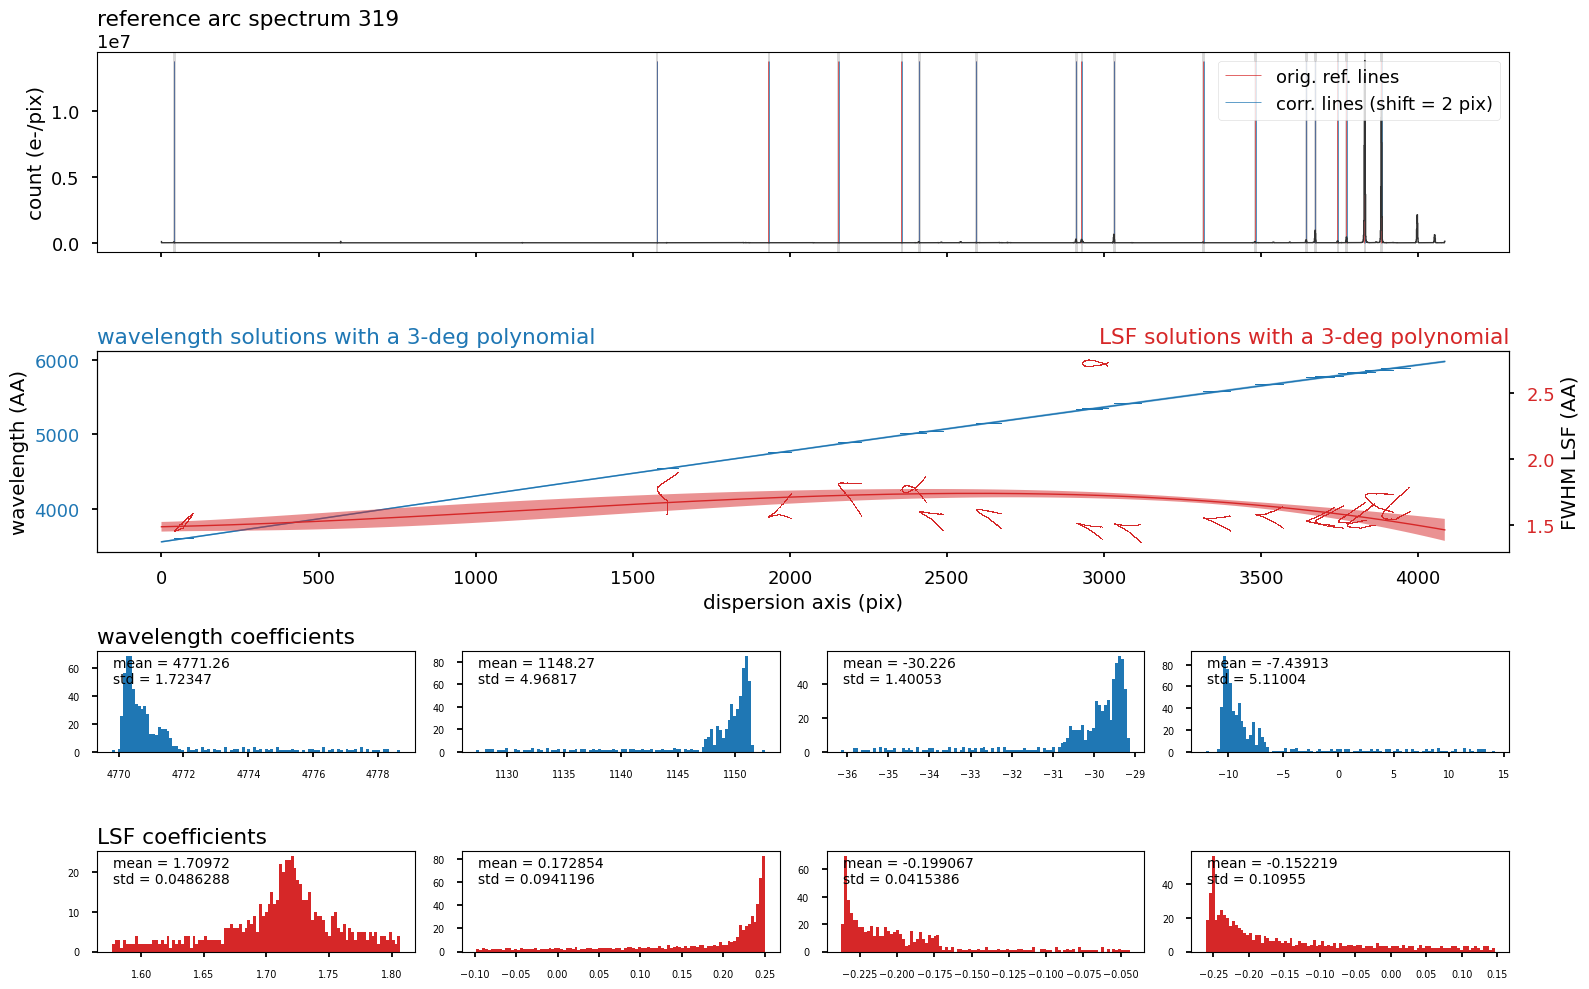

[INFO]: updating header and writing wavelength/LSF to './data/lvm-super-wave-b1-neon.fits' and './data/lvm-super-lsf-b1-neon.fits'
mjd                                    super
kind                                    xarc
camera                                    b2
lamps                                   neon
path      ./data/lvm-super-xarc-b2-neon.fits
Name: 8, dtype: object
[INFO]: reading guess lines from '../../python/lvmdrp/etc/lvm-neon_nist_b1.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of guess lines in file 19 percentage masked  5.26316 %
[INFO]: going to use 18 guess lines
[INFO]: reading arc from './data/lvm-super-xarc-b2-neon.fits'
[INFO]: calculating shift in guess lines using CC
[INFO]: maximum CC shift = 39 pix
[INFO]: measuring arc lines for each fiber from reference fiber 319, flux_min = 10.0, fwhm_max = 5.0 and relative flux limits [0.001, 100.0]


measuring arc lines upwards from ref_fiber = 319: 100%|##############################################| 319/319 [01:18<00:00,  4.04fiber/s]
measuring arc lines downwards from ref_fiber = 319: 100%|############################################| 318/318 [01:07<00:00,  4.70fiber/s]


[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 3-deg polynomials
[INFO]: fitting wavelength solutions using 3-deg polynomials
[INFO]: finished wavelength fitting with median RMS = 0.903236 AA (1.55836 pix)
[INFO]: fitting LSF solutions using 3-deg polynomials
[INFO]: finished LSF fitting with median RMS = 0.260917 AA (0.441344 pix)


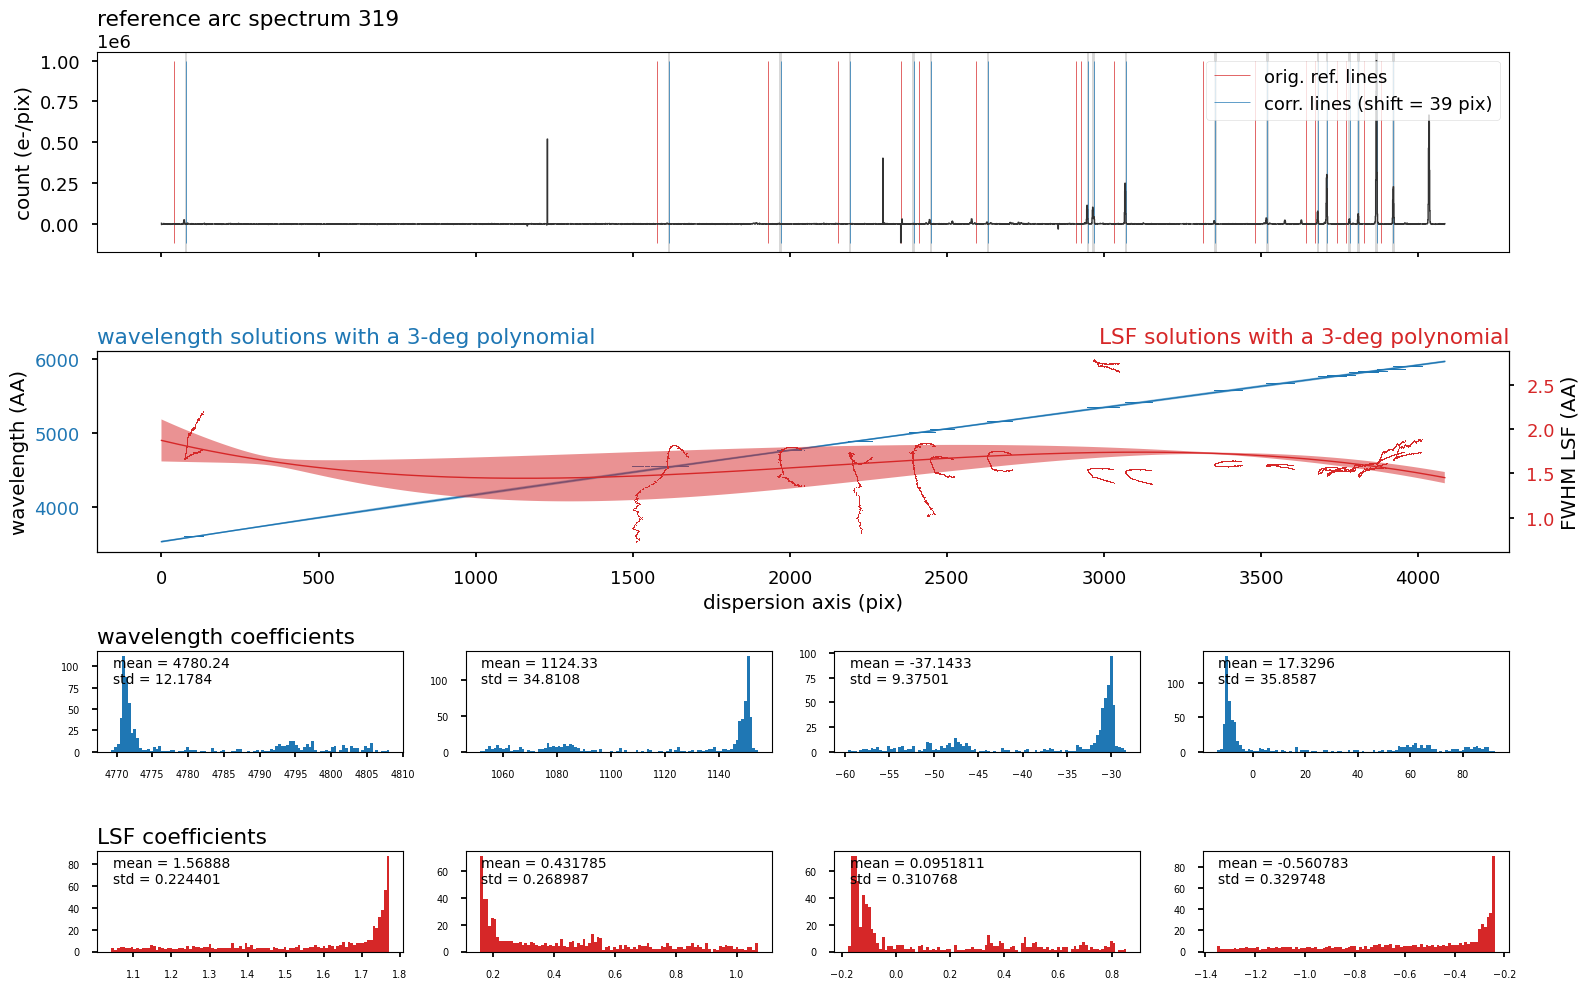

[INFO]: updating header and writing wavelength/LSF to './data/lvm-super-wave-b2-neon.fits' and './data/lvm-super-lsf-b2-neon.fits'
mjd                                    super
kind                                    xarc
camera                                    b3
lamps                                   neon
path      ./data/lvm-super-xarc-b3-neon.fits
Name: 3, dtype: object
[INFO]: reading guess lines from '../../python/lvmdrp/etc/lvm-neon_nist_b1.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of guess lines in file 19 percentage masked  5.26316 %
[INFO]: going to use 18 guess lines
[INFO]: reading arc from './data/lvm-super-xarc-b3-neon.fits'
[INFO]: calculating shift in guess lines using CC
[INFO]: maximum CC shift = 37 pix
[INFO]: measuring arc lines for each fiber from reference fiber 319, flux_min = 10.0, fwhm_max = 5.0 and relative flux limits [0.001, 100.0]


measuring arc lines upwards from ref_fiber = 319: 100%|##############################################| 319/319 [00:25<00:00, 12.55fiber/s]
measuring arc lines downwards from ref_fiber = 319: 100%|############################################| 318/318 [00:20<00:00, 15.17fiber/s]


[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 3-deg polynomials
[INFO]: fitting wavelength solutions using 3-deg polynomials
[INFO]: finished wavelength fitting with median RMS = 0.258935 AA (0.436891 pix)
[INFO]: fitting LSF solutions using 3-deg polynomials
[INFO]: finished LSF fitting with median RMS = 0.262561 AA (0.441403 pix)


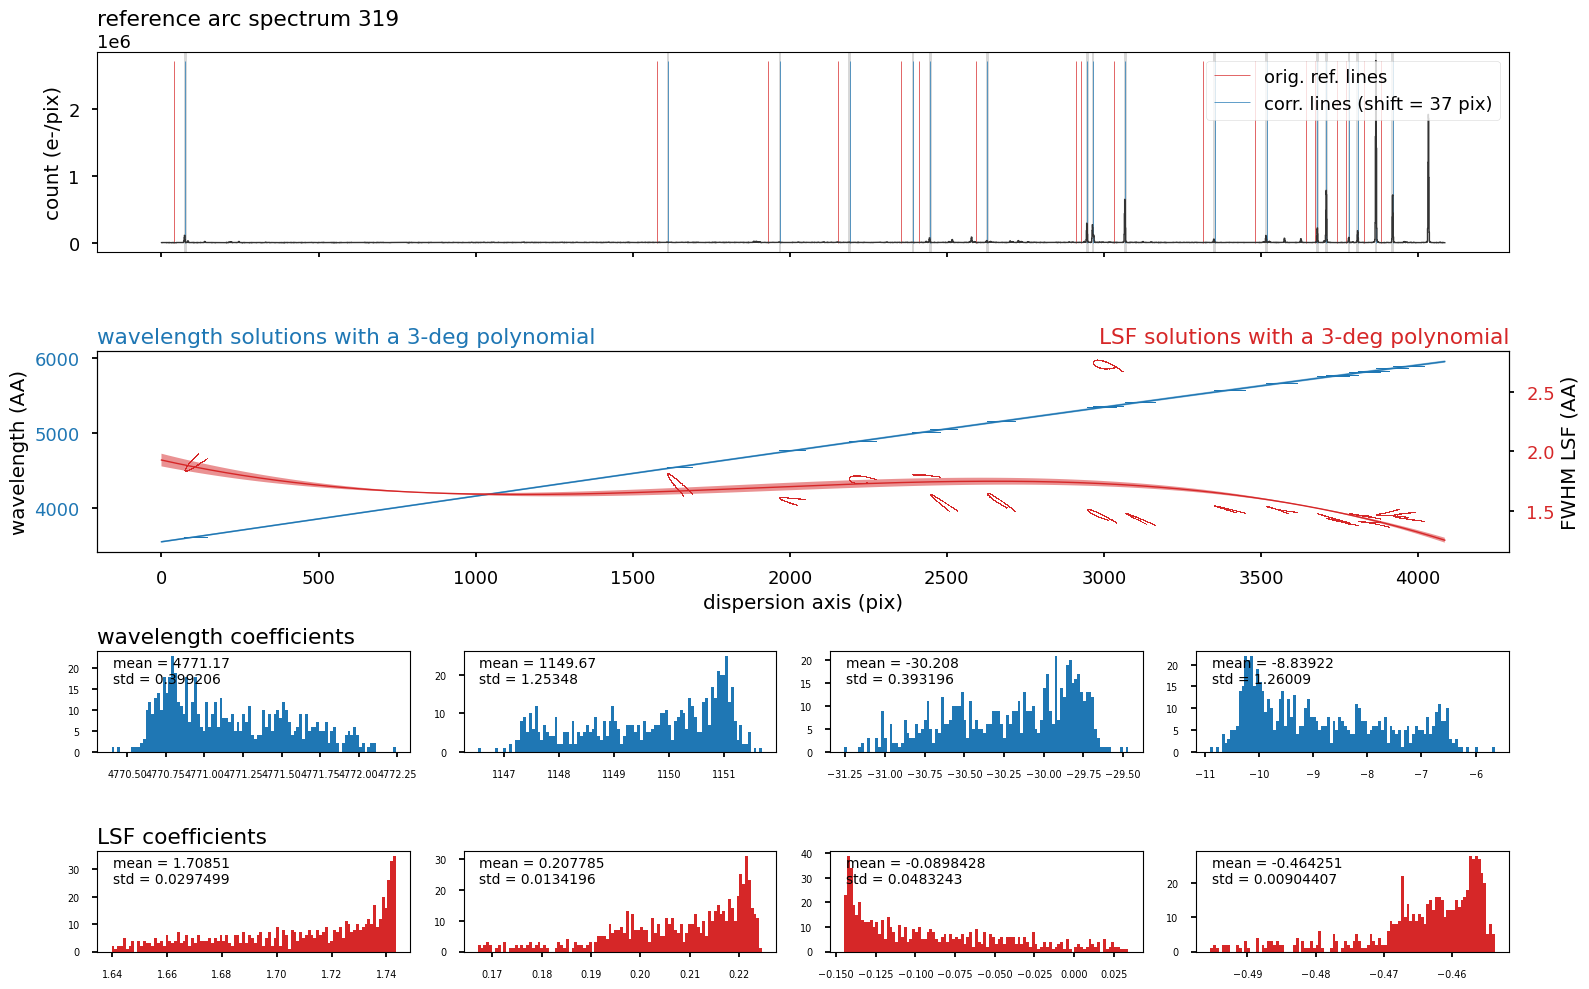

[INFO]: updating header and writing wavelength/LSF to './data/lvm-super-wave-b3-neon.fits' and './data/lvm-super-lsf-b3-neon.fits'
mjd                                    super
kind                                    xarc
camera                                    r1
lamps                                   neon
path      ./data/lvm-super-xarc-r1-neon.fits
Name: 4, dtype: object
[INFO]: reading guess lines from '../../python/lvmdrp/etc/lvm-neon_nist_r1.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of guess lines in file 31 percentage masked  6.45161 %
[INFO]: going to use 29 guess lines
[INFO]: reading arc from './data/lvm-super-xarc-r1-neon.fits'
[INFO]: calculating shift in guess lines using CC
[INFO]: maximum CC shift = 1 pix
[INFO]: measuring arc lines for each fiber from reference fiber 319, flux_min = 10.0, fwhm_max = 5.0 and relative flux limits [0.001, 100.0]


measuring arc lines upwards from ref_fiber = 319:  10%|####8                                          | 33/319 [00:05<00:44,  6.42fiber/s]

[WARNING]: overflow encountered in cast (RuntimeWarning)


measuring arc lines upwards from ref_fiber = 319: 100%|##############################################| 319/319 [00:51<00:00,  6.16fiber/s]
measuring arc lines downwards from ref_fiber = 319: 100%|############################################| 318/318 [00:44<00:00,  7.21fiber/s]


[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 3-deg polynomials
[INFO]: fitting wavelength solutions using 3-deg polynomials
[INFO]: finished wavelength fitting with median RMS = 0.143578 AA (0.269004 pix)
[INFO]: fitting LSF solutions using 3-deg polynomials
[INFO]: finished LSF fitting with median RMS = 0.0805359 AA (0.153302 pix)


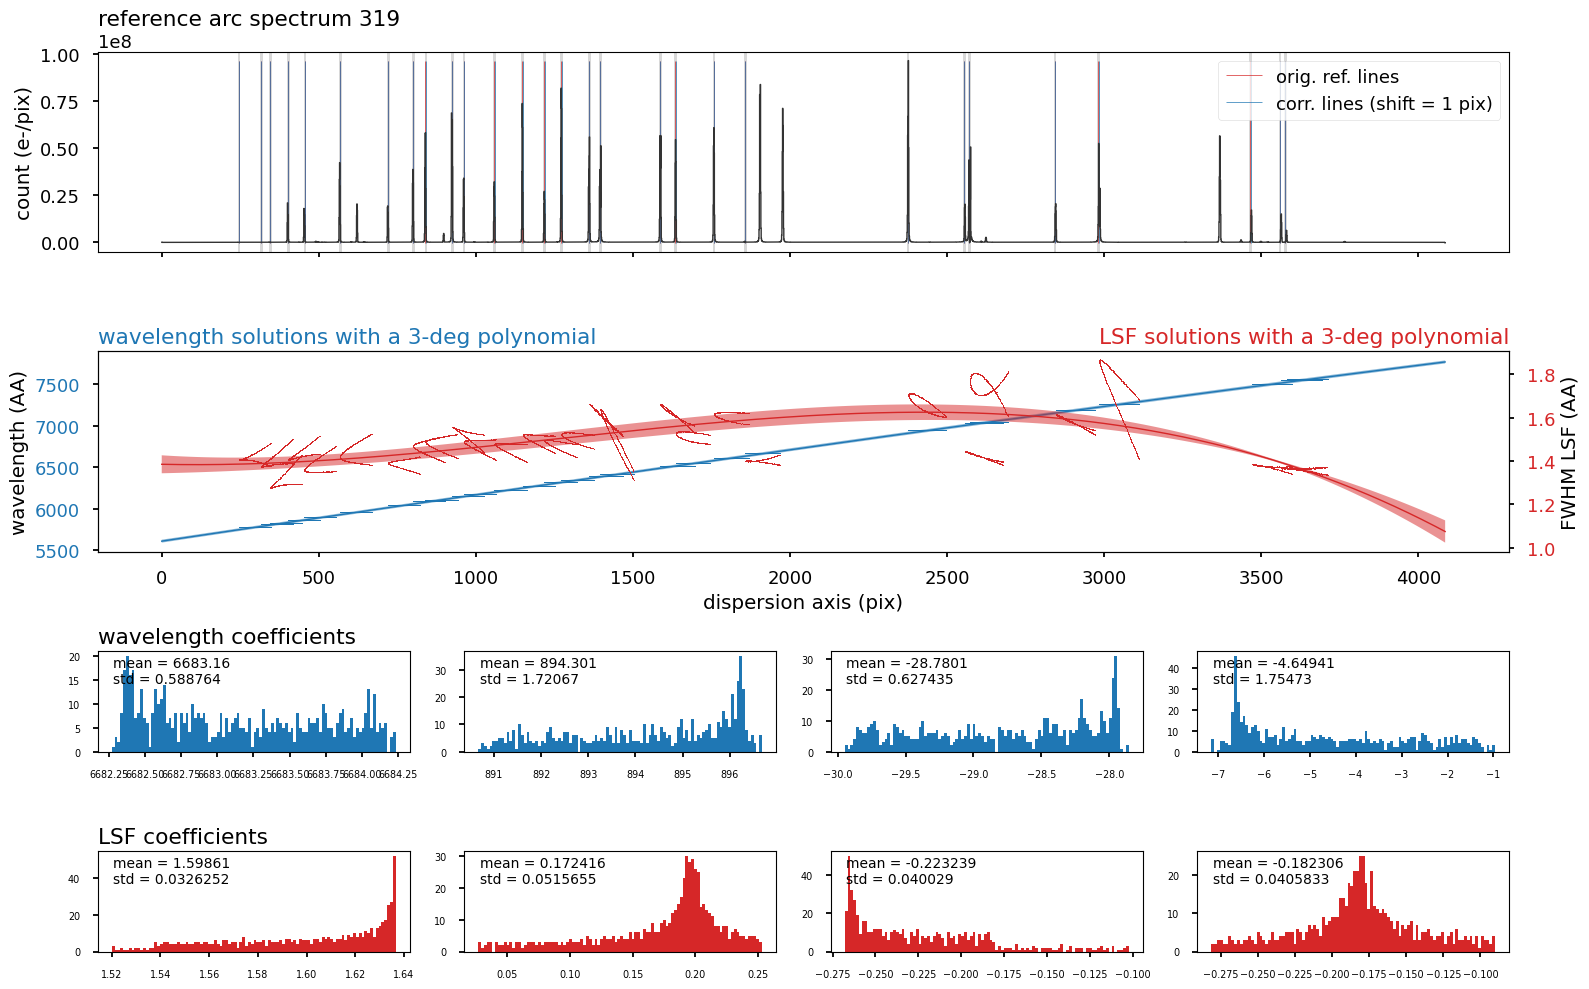

[INFO]: updating header and writing wavelength/LSF to './data/lvm-super-wave-r1-neon.fits' and './data/lvm-super-lsf-r1-neon.fits'
mjd                                    super
kind                                    xarc
camera                                    r2
lamps                                   neon
path      ./data/lvm-super-xarc-r2-neon.fits
Name: 0, dtype: object
[INFO]: reading guess lines from '../../python/lvmdrp/etc/lvm-neon_nist_r1.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of guess lines in file 31 percentage masked  6.45161 %
[INFO]: going to use 29 guess lines
[INFO]: reading arc from './data/lvm-super-xarc-r2-neon.fits'
[INFO]: calculating shift in guess lines using CC
[INFO]: maximum CC shift = 6 pix
[INFO]: measuring arc lines for each fiber from reference fiber 319, flux_min = 10.0, fwhm_max = 5.0 and relative flux limits [0.001, 100.0]


measuring arc lines upwards from ref_fiber = 319: 100%|##############################################| 319/319 [00:38<00:00,  8.20fiber/s]
measuring arc lines downwards from ref_fiber = 319: 100%|############################################| 318/318 [00:37<00:00,  8.39fiber/s]


[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 3-deg polynomials
[INFO]: fitting wavelength solutions using 3-deg polynomials
[INFO]: finished wavelength fitting with median RMS = 5.82166 AA (11.296 pix)
[INFO]: fitting LSF solutions using 3-deg polynomials
[INFO]: finished LSF fitting with median RMS = 0.0435633 AA (0.0817418 pix)


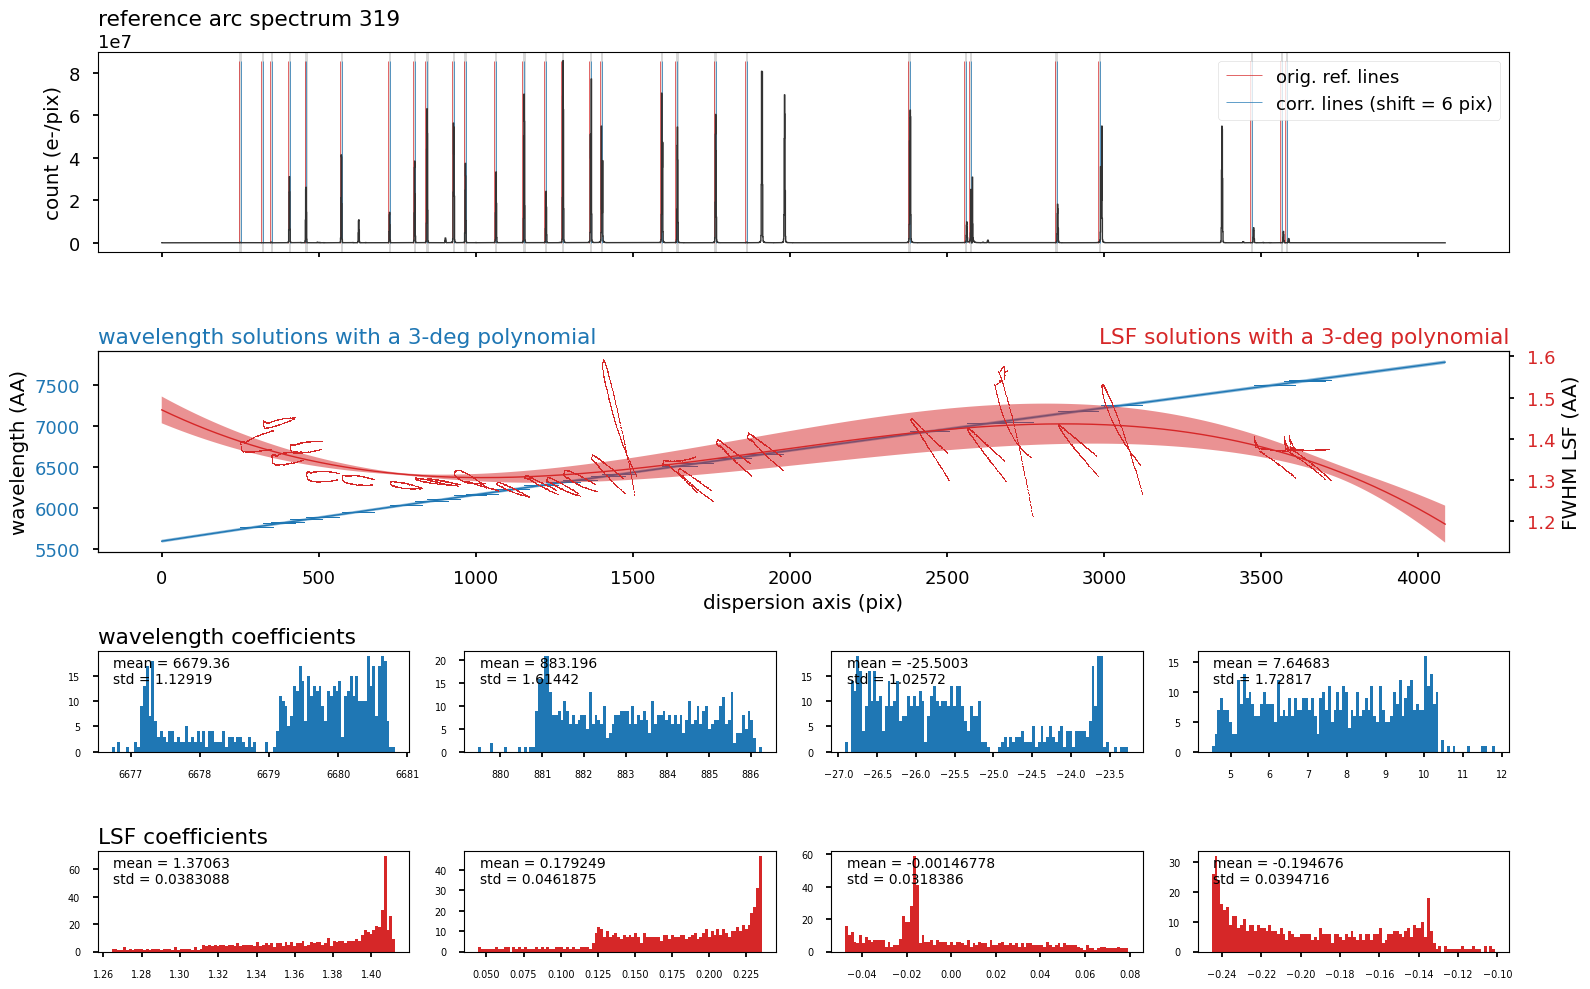

[INFO]: updating header and writing wavelength/LSF to './data/lvm-super-wave-r2-neon.fits' and './data/lvm-super-lsf-r2-neon.fits'
mjd                                    super
kind                                    xarc
camera                                    r3
lamps                                   neon
path      ./data/lvm-super-xarc-r3-neon.fits
Name: 6, dtype: object
[INFO]: reading guess lines from '../../python/lvmdrp/etc/lvm-neon_nist_r1.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of guess lines in file 31 percentage masked  6.45161 %
[INFO]: going to use 29 guess lines
[INFO]: reading arc from './data/lvm-super-xarc-r3-neon.fits'
[INFO]: calculating shift in guess lines using CC
[INFO]: maximum CC shift = -7 pix
[INFO]: measuring arc lines for each fiber from reference fiber 319, flux_min = 10.0, fwhm_max = 5.0 and relative flux limits [0.001, 100.0]


measuring arc lines upwards from ref_fiber = 319: 100%|##############################################| 319/319 [03:02<00:00,  1.75fiber/s]
measuring arc lines downwards from ref_fiber = 319: 100%|############################################| 318/318 [02:39<00:00,  1.99fiber/s]


[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 3-deg polynomials
[INFO]: fitting wavelength solutions using 3-deg polynomials
[INFO]: finished wavelength fitting with median RMS = 11.6018 AA (21.6443 pix)
[INFO]: fitting LSF solutions using 3-deg polynomials
[INFO]: finished LSF fitting with median RMS = 0.177307 AA (0.329795 pix)


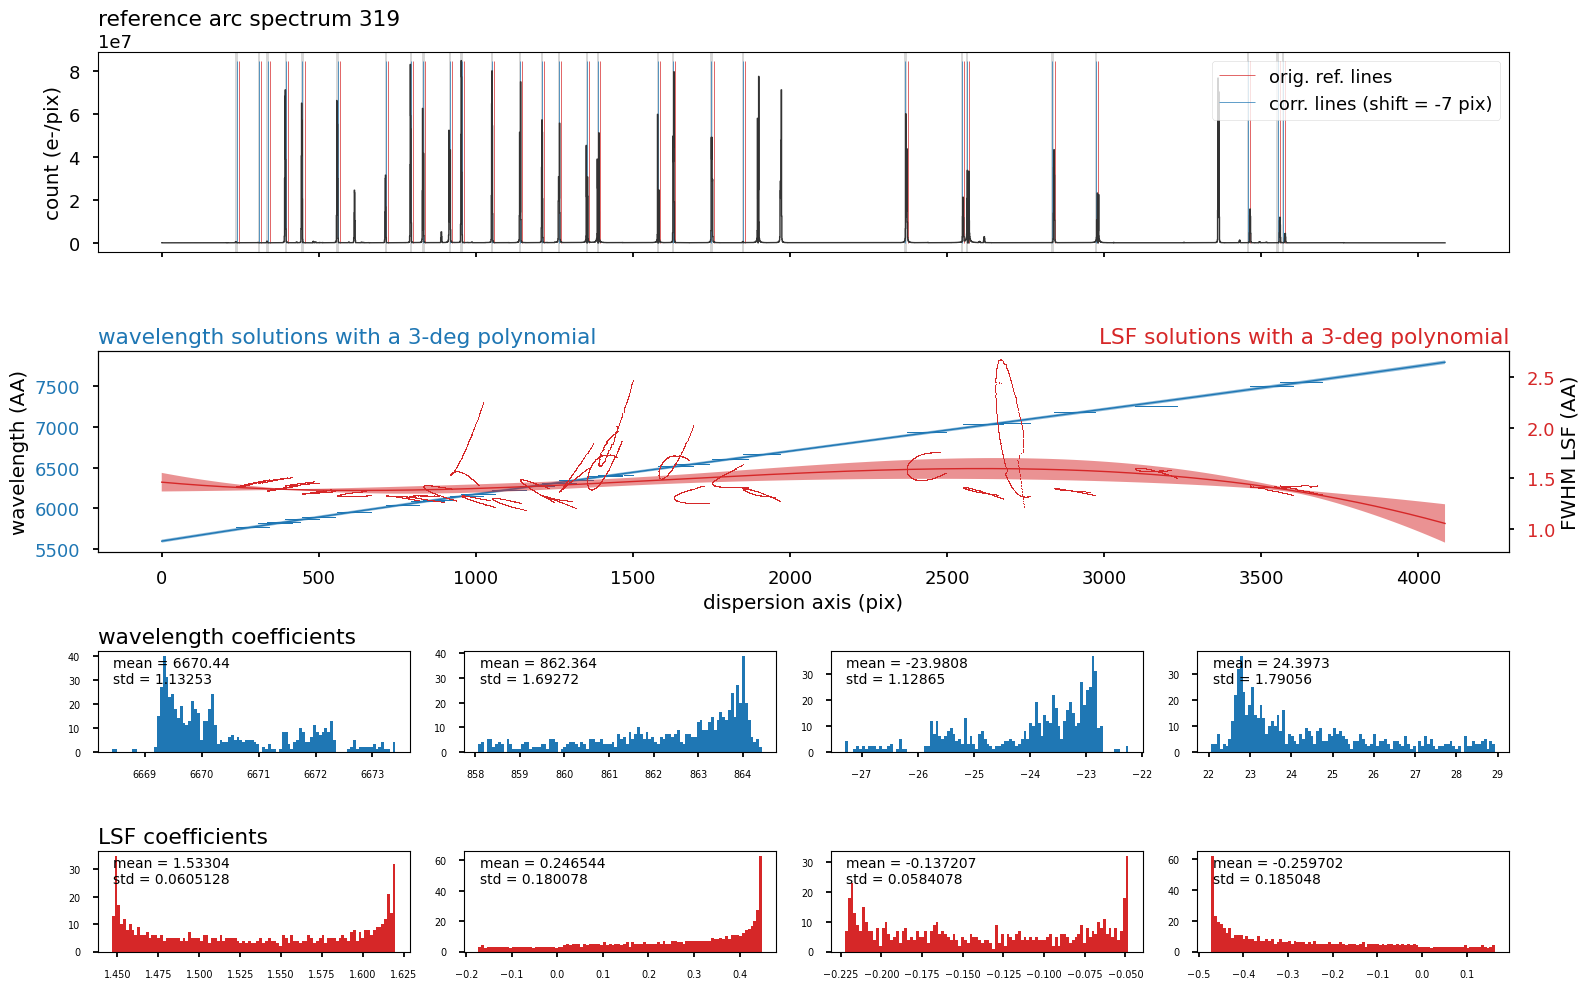

[INFO]: updating header and writing wavelength/LSF to './data/lvm-super-wave-r3-neon.fits' and './data/lvm-super-lsf-r3-neon.fits'
mjd                                    super
kind                                    xarc
camera                                    z1
lamps                                   neon
path      ./data/lvm-super-xarc-z1-neon.fits
Name: 1, dtype: object
[INFO]: reading guess lines from '../../python/lvmdrp/etc/lvm-neon_nist_z1.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of guess lines in file 29 percentage masked  17.2414 %
[INFO]: going to use 24 guess lines
[INFO]: reading arc from './data/lvm-super-xarc-z1-neon.fits'
[INFO]: calculating shift in guess lines using CC
[INFO]: maximum CC shift = 1 pix
[INFO]: measuring arc lines for each fiber from reference fiber 319, flux_min = 10.0, fwhm_max = 5.0 and relative flux limits [0.001, 100.0]


measuring arc lines upwards from ref_fiber = 319: 100%|##############################################| 319/319 [00:12<00:00, 26.13fiber/s]
measuring arc lines downwards from ref_fiber = 319: 100%|############################################| 318/318 [00:14<00:00, 22.40fiber/s]


[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 3-deg polynomials
[INFO]: fitting wavelength solutions using 3-deg polynomials
[INFO]: finished wavelength fitting with median RMS = 0.248632 AA (0.408206 pix)
[INFO]: fitting LSF solutions using 3-deg polynomials
[INFO]: finished LSF fitting with median RMS = 0.0740365 AA (0.122166 pix)


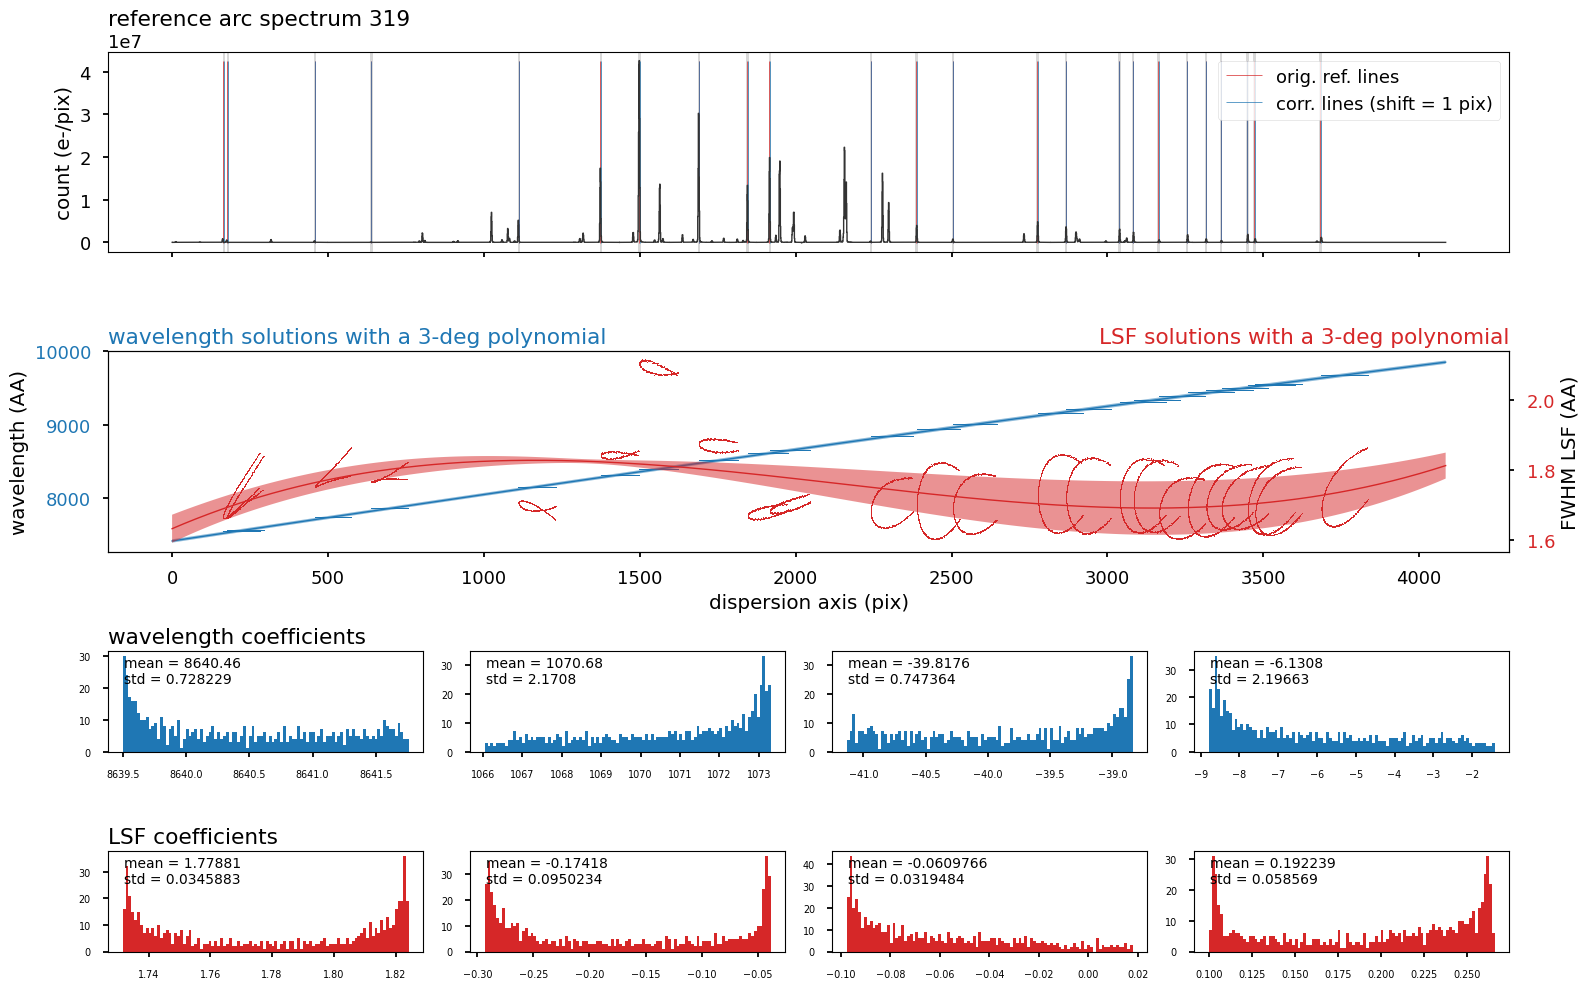

[INFO]: updating header and writing wavelength/LSF to './data/lvm-super-wave-z1-neon.fits' and './data/lvm-super-lsf-z1-neon.fits'
mjd                                    super
kind                                    xarc
camera                                    z2
lamps                                   neon
path      ./data/lvm-super-xarc-z2-neon.fits
Name: 7, dtype: object
[INFO]: reading guess lines from '../../python/lvmdrp/etc/lvm-neon_nist_z1.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of guess lines in file 29 percentage masked  17.2414 %
[INFO]: going to use 24 guess lines
[INFO]: reading arc from './data/lvm-super-xarc-z2-neon.fits'
[INFO]: calculating shift in guess lines using CC
[INFO]: maximum CC shift = 9 pix
[INFO]: measuring arc lines for each fiber from reference fiber 319, flux_min = 10.0, fwhm_max = 5.0 and relative flux limits [0.001, 100.0]


measuring arc lines upwards from ref_fiber = 319: 100%|##############################################| 319/319 [00:13<00:00, 23.97fiber/s]
measuring arc lines downwards from ref_fiber = 319: 100%|############################################| 318/318 [00:12<00:00, 26.36fiber/s]


[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 3-deg polynomials
[INFO]: fitting wavelength solutions using 3-deg polynomials
[INFO]: finished wavelength fitting with median RMS = 0.239109 AA (0.394894 pix)
[INFO]: fitting LSF solutions using 3-deg polynomials
[INFO]: finished LSF fitting with median RMS = 0.0334218 AA (0.0555299 pix)


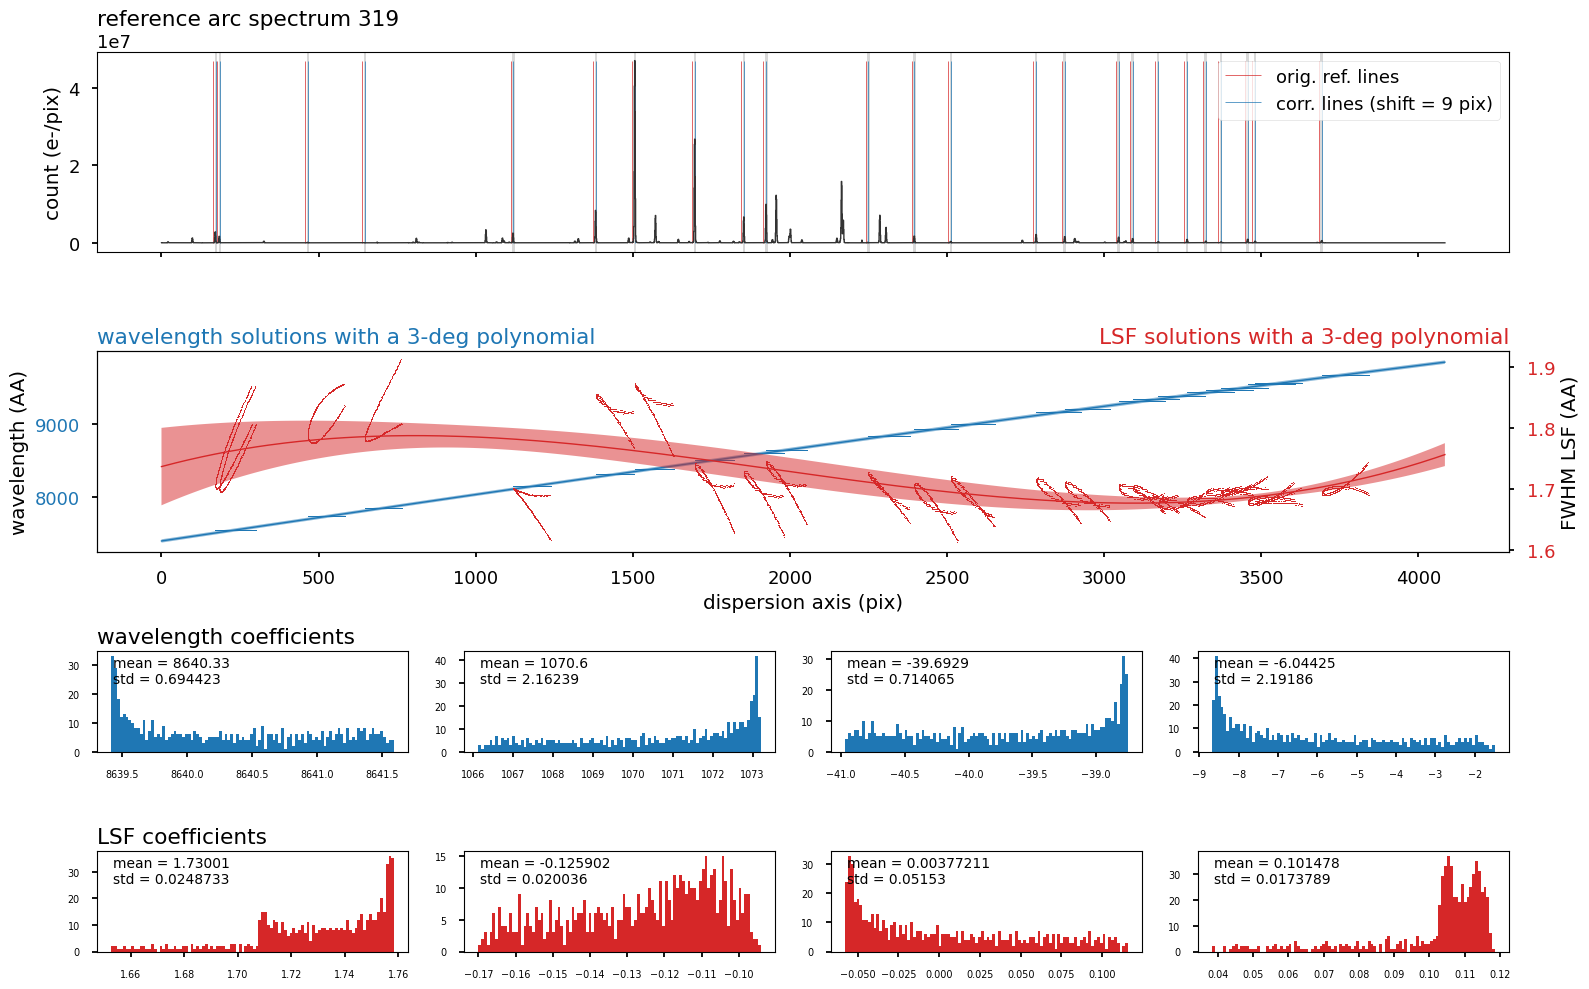

[INFO]: updating header and writing wavelength/LSF to './data/lvm-super-wave-z2-neon.fits' and './data/lvm-super-lsf-z2-neon.fits'
mjd                                    super
kind                                    xarc
camera                                    z3
lamps                                   neon
path      ./data/lvm-super-xarc-z3-neon.fits
Name: 5, dtype: object
[INFO]: reading guess lines from '../../python/lvmdrp/etc/lvm-neon_nist_z1.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of guess lines in file 29 percentage masked  17.2414 %
[INFO]: going to use 24 guess lines
[INFO]: reading arc from './data/lvm-super-xarc-z3-neon.fits'
[INFO]: calculating shift in guess lines using CC
[INFO]: maximum CC shift = -14 pix
[INFO]: measuring arc lines for each fiber from reference fiber 319, flux_min = 10.0, fwhm_max = 5.0 and relative flux limits [0.001, 100.0]


measuring arc lines upwards from ref_fiber = 319: 100%|##############################################| 319/319 [00:13<00:00, 24.34fiber/s]
measuring arc lines downwards from ref_fiber = 319: 100%|############################################| 318/318 [00:13<00:00, 23.30fiber/s]


[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 3-deg polynomials
[INFO]: fitting wavelength solutions using 3-deg polynomials
[INFO]: finished wavelength fitting with median RMS = 0.245812 AA (0.40861 pix)
[INFO]: fitting LSF solutions using 3-deg polynomials
[INFO]: finished LSF fitting with median RMS = 0.0471809 AA (0.0783298 pix)


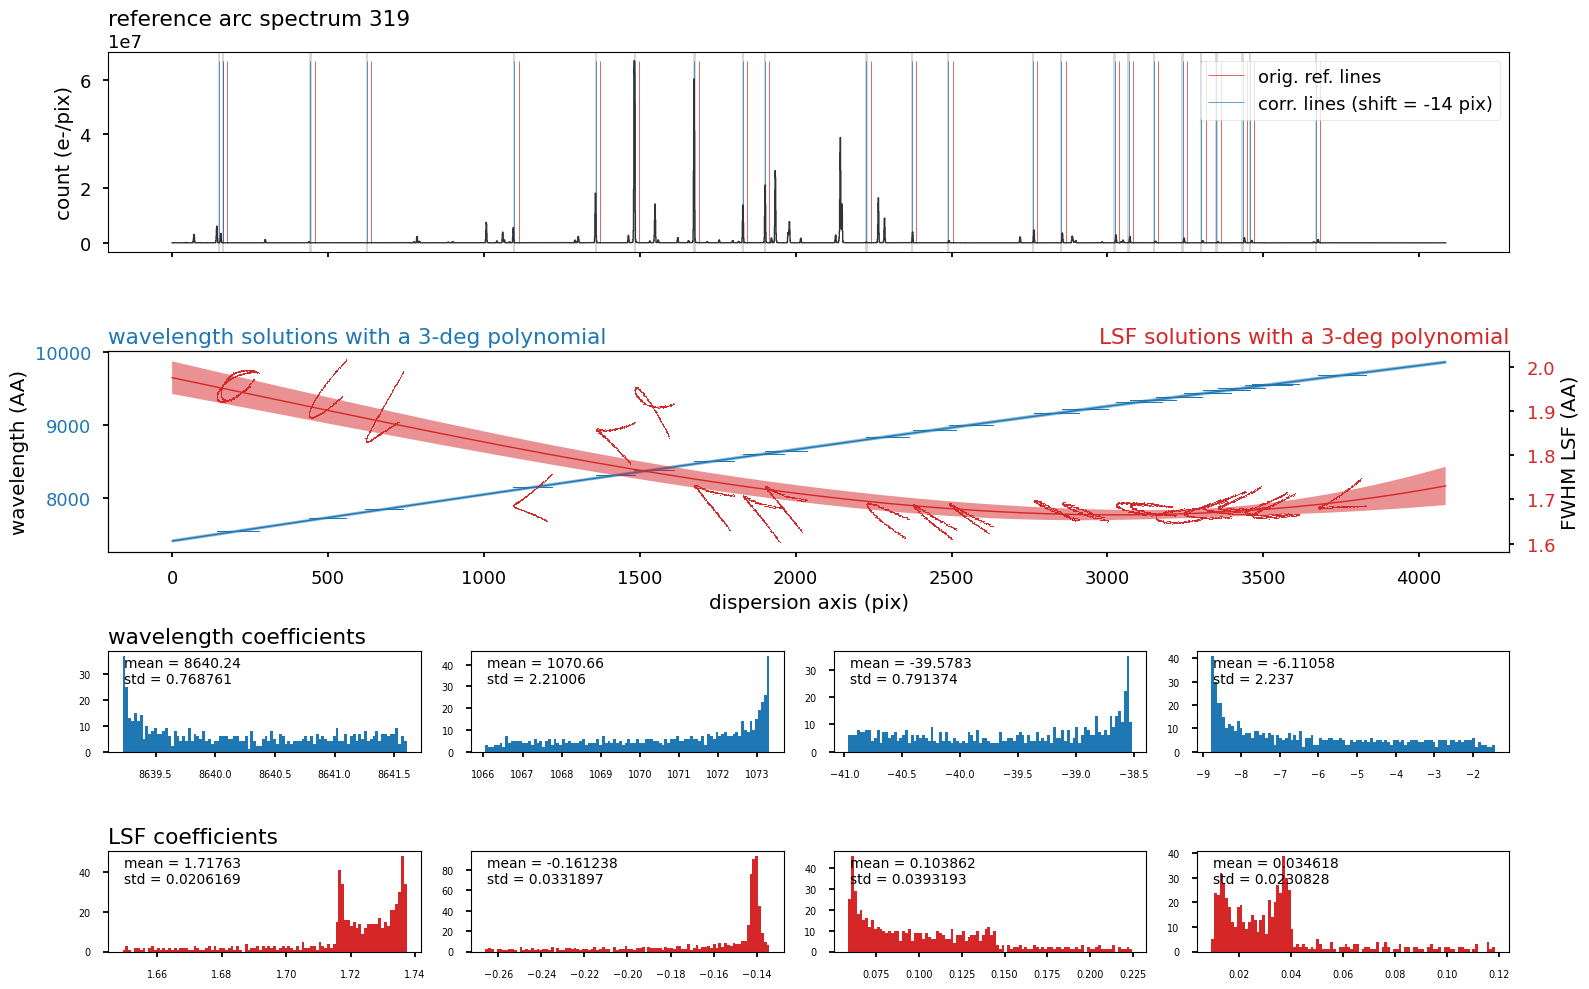

[INFO]: updating header and writing wavelength/LSF to './data/lvm-super-wave-z3-neon.fits' and './data/lvm-super-lsf-z3-neon.fits'


In [4]:
CHANNEL_WL = {"b": (3600, 5930), "r": (5660, 7720), "z": (7470, 9800)}
LAMPS = "neon"
REF_FIBER = 319

masters_arc = get_masters_metadata(path_pattern=out_arc_path, mjd="super", kind="xarc", lamps=LAMPS).sort_values("camera")
print(masters_arc.to_string())

for _, marc in masters_arc.iterrows():
    print(marc)

    try:
        rssMethod.detWaveSolution_drp(
            in_arc=marc.path,
            out_wave=out_arc_path.format(mjd=marc.mjd, kind="wave", camera=marc.camera, lamps=marc.lamps),
            out_lsf=out_arc_path.format(mjd=marc.mjd, kind="lsf", camera=marc.camera, lamps=marc.lamps),
            in_ref_lines=f"../../python/lvmdrp/etc/lvm-{LAMPS}_nist_{marc.camera[0]}1.txt",
            ref_fiber=REF_FIBER, poly_disp=3, poly_fwhm=3, poly_cros=3, poly_kinds="poly,poly,poly",
            flux_min="10.0", fwhm_max="5.0", rel_flux_limits="0.001,100", aperture=10, plot=1
        )
        rssMethod.createPixTable_drp(
            in_rss=out_arc_path.format(mjd=marc.mjd, kind="xarc", camera=marc.camera, lamps=marc.lamps),
            out_rss=out_arc_path.format(mjd=marc.mjd, kind="warc", camera=marc.camera, lamps=marc.lamps),
            arc_wave=out_arc_path.format(mjd=marc.mjd, kind="wave", camera=marc.camera, lamps=marc.lamps),
            arc_fwhm=out_arc_path.format(mjd=marc.mjd, kind="lsf", camera=marc.camera, lamps=marc.lamps)
        )
        wave_range = CHANNEL_WL[marc.camera[0]]
        rssMethod.resampleWave_drp(
            in_rss=out_arc_path.format(mjd=marc.mjd, kind="warc", camera=marc.camera, lamps=marc.lamps),
            out_rss=out_arc_path.format(mjd=marc.mjd, kind="harc", camera=marc.camera, lamps=marc.lamps),
            start_wave=wave_range[0], end_wave=wave_range[1], disp_pix=1.0, method="linear",
            err_sim=10, parallel="auto", extrapolate=True
        )
    except Exception as e:
        rssMethod.rss_logger.error(e)

In [5]:
fiberflats = get_masters_metadata(path_pattern=out_calib_path, mjd="super", kind="xfiberflat", exptime="x").sort_values("camera")

for _, fiberflat in fiberflats.iterrows():
    print(fiberflat)
    
    rssMethod.createPixTable_drp(
        in_rss=fiberflat.path,
        out_rss=out_calib_path.format(mjd=fiberflat.mjd, kind="wfiberflat", camera=fiberflat.camera, exptime=fiberflat.exptime),
        arc_wave=out_arc_path.format(mjd=fiberflat.mjd, kind="wave", camera=fiberflat.camera, lamps=LAMPS),
        arc_fwhm=out_arc_path.format(mjd=fiberflat.mjd, kind="lsf", camera=fiberflat.camera, lamps=LAMPS)
    )

    wave_range = CHANNEL_WL[fiberflat.camera[0]]
    rssMethod.resampleWave_drp(
        in_rss=out_calib_path.format(mjd=fiberflat.mjd, kind="wfiberflat", camera=fiberflat.camera, exptime=fiberflat.exptime),
        out_rss=out_calib_path.format(mjd=fiberflat.mjd, kind="hfiberflat", camera=fiberflat.camera, exptime=fiberflat.exptime),
        start_wave=wave_range[0], end_wave=wave_range[1], disp_pix=1.0, method="linear",
        err_sim=10, parallel="auto", extrapolate=True
    )

mjd                                        super
kind                                  xfiberflat
camera                                        b1
exptime                                        x
path       ./data/lvm-super-xfiberflat-b1-x.fits
Name: 3, dtype: object
mjd                                        super
kind                                  xfiberflat
camera                                        b2
exptime                                        x
path       ./data/lvm-super-xfiberflat-b2-x.fits
Name: 7, dtype: object
mjd                                        super
kind                                  xfiberflat
camera                                        b3
exptime                                        x
path       ./data/lvm-super-xfiberflat-b3-x.fits
Name: 4, dtype: object
mjd                                        super
kind                                  xfiberflat
camera                                        r1
exptime                                        x


In [6]:
arcs = get_masters_metadata(path_pattern=out_arc_path, mjd="super", kind="xarc", lamps=LAMPS).sort_values("camera")

for _, arc in arcs.iterrows():
    print(arc)
    
    rssMethod.createPixTable_drp(
        in_rss=arc.path,
        out_rss=out_arc_path.format(mjd=arc.mjd, kind="warc", camera=arc.camera, lamps=LAMPS),
        arc_wave=out_arc_path.format(mjd=arc.mjd, kind="wave", camera=arc.camera, lamps=LAMPS),
        arc_fwhm=out_arc_path.format(mjd=arc.mjd, kind="lsf", camera=arc.camera, lamps=LAMPS)
    )

    wave_range = CHANNEL_WL[arc.camera[0]]
    rssMethod.resampleWave_drp(
        in_rss=out_arc_path.format(mjd=arc.mjd, kind="warc", camera=arc.camera, lamps=LAMPS),
        out_rss=out_arc_path.format(mjd=arc.mjd, kind="harc", camera=arc.camera, lamps=LAMPS),
        start_wave=wave_range[0], end_wave=wave_range[1], disp_pix=1.0, method="linear",
        err_sim=10, parallel="auto", extrapolate=True
    )

mjd                                    super
kind                                    xarc
camera                                    b1
lamps                                   neon
path      ./data/lvm-super-xarc-b1-neon.fits
Name: 2, dtype: object
mjd                                    super
kind                                    xarc
camera                                    b2
lamps                                   neon
path      ./data/lvm-super-xarc-b2-neon.fits
Name: 8, dtype: object
mjd                                    super
kind                                    xarc
camera                                    b3
lamps                                   neon
path      ./data/lvm-super-xarc-b3-neon.fits
Name: 3, dtype: object
mjd                                    super
kind                                    xarc
camera                                    r1
lamps                                   neon
path      ./data/lvm-super-xarc-r1-neon.fits
Name: 4, dtype: object
mjd     